# Amazon Reviews
## Pre-Processing and Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy
import itertools
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize
from nltk import wordpunct_tokenize, WordNetLemmatizer, pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from textblob import TextBlob, Word

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mythr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mythr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#open the cleaned data
df = pd.read_csv('amazon_reviews.csv')
five_star = pd.read_csv('amazon_5reviews.csv')

In [3]:
df = df.drop(columns = 'Unnamed: 0', axis=1)

In [4]:
five_star = five_star.drop(columns = 'Unnamed: 0', axis=1)

In [5]:
#Let's make everything lowercase in review text
def lower_case(text):
    return (str(text).lower())
df['reviews_text'] = df['reviews_text'].apply(lower_case)
df['reviews_title'] = df['reviews_title'].apply(lower_case)
five_star['reviews_text'] = five_star['reviews_text'].apply(lower_case)
five_star['reviews_title'] = five_star['reviews_title'].apply(lower_case)

In [6]:
#remove all the special characters keeping only alphanumeric values
def remove_sp_char(string):
    return re.sub(r'[^A-Za-z0-9 ]+', '', string)    
df['reviews_text'] = df['reviews_text'].apply(remove_sp_char)
df['reviews_title'] = df['reviews_title'].apply(remove_sp_char)
five_star['reviews_text'] = five_star['reviews_text'].apply(remove_sp_char)
five_star['reviews_title'] = five_star['reviews_title'].apply(remove_sp_char)

In [7]:
df.head()

,id,name,asins,brand,categories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name,primary_category
0,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,False,0.0,3.0,i thought it would be as big as small paper bu...,too small,1,0,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
1,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,this kindle is light and easy to use especiall...,great light reader easy to use at the beach,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
2,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,True,0.0,4.0,didnt know how much id use a kindle so went fo...,great for the price,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
3,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,i am 100 happy with my purchase i caught it on...,a great buy,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
4,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,solid entry level kindle great for kids gifted...,solid entrylevel kindle great for kids,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader


In [8]:
five_star.head()

,id,name,asins,brand,categories,manufacturer,manufacturerNumber,reviews_date,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name,primary_category
0,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,True,0.0,5.0,this kindle is light and easy to use especiall...,great light reader easy to use at the beach,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
1,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,True,3.0,5.0,i am 100 happy with my purchase i caught it on...,a great buy,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
2,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,True,0.0,5.0,solid entry level kindle great for kids gifted...,solid entrylevel kindle great for kids,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
3,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2016-12-14T00:00:00.000Z,False,0.0,5.0,this make an excellent ebook reader dont expec...,good ebook,1,0,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
4,AVqVGZNvQMlgsOJE6eUY,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Amazon,B00ZV9PXP2,2017-12-20T17:38:23.000Z,True,0.0,5.0,i ordered this for my daughter as i have the b...,light weight makes a world of difference when...,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader


In [9]:
# change ratings to integers
df['reviews_rating'] = df['reviews_rating'].astype(int)
df['reviews_numHelpful'] = df['reviews_numHelpful'].astype(int)

In [10]:
#drop unecessary columns from df and the recommended reviews from the five_star dataframe
five_star = five_star.drop(['categories', 'brand', 'reviews_doRecommend', 'manufacturer', 'reviews_date', 'asins', 'id'], axis=1)
df = df.drop(['categories', 'brand', 'manufacturer', 'reviews_doRecommend', 'reviews_date', 'id', 'asins'], axis=1)


In [11]:
df.head()

,name,manufacturerNumber,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name,primary_category
0,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,3,i thought it would be as big as small paper bu...,too small,1,0,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
1,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,this kindle is light and easy to use especiall...,great light reader easy to use at the beach,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
2,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,4,didnt know how much id use a kindle so went fo...,great for the price,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
3,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,3,5,i am 100 happy with my purchase i caught it on...,a great buy,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader
4,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,solid entry level kindle great for kids gifted...,solid entrylevel kindle great for kids,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",E-Reader


For now, I am thinking of keeping stopwords in because words like "not" might be removed causing a positive or negative review to be misread (even if we have the star rating present, I just want to be safe)

In [12]:
df['reviews_rating'].value_counts()

5    14612
4     5577
3      884
2      276
1      276
Name: reviews_rating, dtype: int64

In [13]:
#one hot encode the primary categories
categories = pd.get_dummies(df['primary_category'])

In [14]:
categories.head()

,Cases,Charger,E-Reader,Fire TV,Personal Assistant,Speaker,Tablets
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [15]:
df = df.merge(categories, left_index = True, right_index = True)
df = df.drop(['primary_category'], axis=1)
df.head()

,name,manufacturerNumber,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name,Cases,Charger,E-Reader,Fire TV,Personal Assistant,Speaker,Tablets
0,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,3,i thought it would be as big as small paper bu...,too small,1,0,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
1,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,this kindle is light and easy to use especiall...,great light reader easy to use at the beach,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
2,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,4,didnt know how much id use a kindle so went fo...,great for the price,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
3,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,3,5,i am 100 happy with my purchase i caught it on...,a great buy,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
4,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,solid entry level kindle great for kids gifted...,solid entrylevel kindle great for kids,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0


In [16]:
five_star_cats = pd.get_dummies(five_star['primary_category'])
five_star_cats.head()

,Cases,Charger,E-Reader,Fire TV,Personal Assistant,Speaker,Tablets
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [17]:
# change ratings to integers for the 5 star rated part
five_star['reviews_rating'] = five_star['reviews_rating'].astype(int)
five_star['reviews_numHelpful'] = five_star['reviews_numHelpful'].astype(int)

In [18]:
#merge the encoded columns
five_star = five_star.merge(five_star_cats, left_index = True, right_index = True)
five_star = five_star.drop(['primary_category'], axis=1)
five_star.head()

,name,manufacturerNumber,reviews_numHelpful,reviews_rating,reviews_text,reviews_title,not_recommended,recommended,tokenized_name,Cases,Charger,E-Reader,Fire TV,Personal Assistant,Speaker,Tablets
0,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,this kindle is light and easy to use especiall...,great light reader easy to use at the beach,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
1,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,3,5,i am 100 happy with my purchase i caught it on...,a great buy,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
2,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,solid entry level kindle great for kids gifted...,solid entrylevel kindle great for kids,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
3,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,this make an excellent ebook reader dont expec...,good ebook,1,0,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0
4,amazon kindle ereader 6 wifi 8th generation 2016,B00ZV9PXP2,0,5,i ordered this for my daughter as i have the b...,light weight makes a world of difference when...,0,1,"['amazon', 'kindle', 'ereader', '6', 'wifi', '...",0,0,1,0,0,0,0


In [19]:
#I am going to separate review text and star rating to use tfidf and analyze better
reviews_df = df[['reviews_rating', 'reviews_text']]

In [20]:
print(type(reviews_df))

<class 'pandas.core.frame.DataFrame'>


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [22]:
reviews_df.head()

,reviews_rating,reviews_text
0,3,i thought it would be as big as small paper bu...
1,5,this kindle is light and easy to use especiall...
2,4,didnt know how much id use a kindle so went fo...
3,5,i am 100 happy with my purchase i caught it on...
4,5,solid entry level kindle great for kids gifted...


In [23]:
reviews_df.shape

(21625, 2)

In [24]:
reviews_df['reviews_rating'].value_counts()

5    14612
4     5577
3      884
2      276
1      276
Name: reviews_rating, dtype: int64

In [25]:
five_star = five_star[['reviews_rating', 'reviews_text']]

I am going to create a word cloud to see what words are most commonly used in five star reviews, so I'll need to tokenize the text first then create the cloud

In [26]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [27]:
text = " ".join(review for review in five_star.reviews_text)
print ("There are {} words in the combination of all the 5 star reviews.".format(len(text)))

There are 2131969 words in the combination of all the 5 star reviews.


In [28]:
#we don;t need stopwords in a wordcloud
stopwords = set(STOPWORDS)

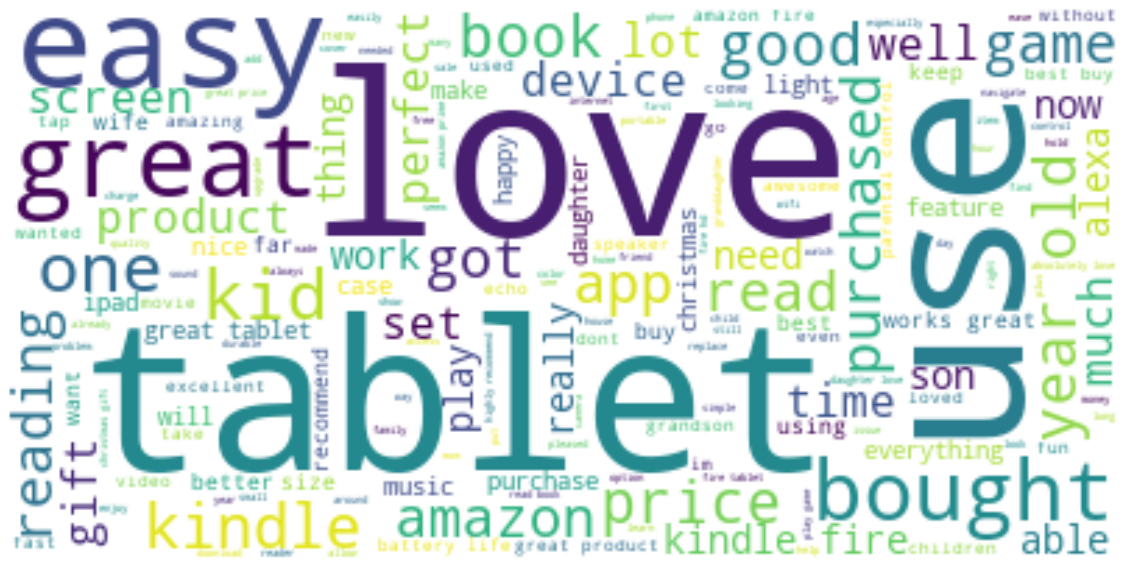

In [29]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Modeling without Resampling
There are a disproportionate amount of 5 star ratings, I want to first observe models without resampling, then I will resample and improve my model further

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
#use tfidf on the reviews to tokenize and create our independent and dependent variables
tfidf = TfidfVectorizer(max_features = 20000, ngram_range = (1,3), analyzer = 'char')

In [32]:
#split data into X and y then perform train_test_split
X = tfidf.fit_transform(reviews_df['reviews_text'])
y = reviews_df['reviews_rating']

In [33]:
#perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

In [34]:
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#try linear SVC first
clf = LinearSVC(max_iter = 10000, dual = True)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           1       0.53      0.87      0.66        69
           2       0.53      0.72      0.61        69
           3       0.68      0.74      0.71       221
           4       0.73      0.74      0.73      1394
           5       0.90      0.87      0.89      3654

    accuracy                           0.83      5407
   macro avg       0.67      0.79      0.72      5407
weighted avg       0.84      0.83      0.83      5407



The accuracy is pretty decent, but it is not an effective measure to gauge the performance of the models as the data is imbalanced. The precision values are very low for one and two star ratings, the recall values and f1 scores are decent. I tried running other models like random forest and logistic regression, but the datasets are too large

In [37]:
reviews_df.head()

,reviews_rating,reviews_text
0,3,i thought it would be as big as small paper bu...
1,5,this kindle is light and easy to use especiall...
2,4,didnt know how much id use a kindle so went fo...
3,5,i am 100 happy with my purchase i caught it on...
4,5,solid entry level kindle great for kids gifted...


In [38]:
#add the category features back to the reviews 
reviews_df = reviews_df.merge(categories, left_index = True, right_index = True)

In [39]:
reviews_df.head()

,reviews_rating,reviews_text,Cases,Charger,E-Reader,Fire TV,Personal Assistant,Speaker,Tablets
0,3,i thought it would be as big as small paper bu...,0,0,1,0,0,0,0
1,5,this kindle is light and easy to use especiall...,0,0,1,0,0,0,0
2,4,didnt know how much id use a kindle so went fo...,0,0,1,0,0,0,0
3,5,i am 100 happy with my purchase i caught it on...,0,0,1,0,0,0,0
4,5,solid entry level kindle great for kids gifted...,0,0,1,0,0,0,0


In [40]:
text = reviews_df['reviews_text'].tolist()

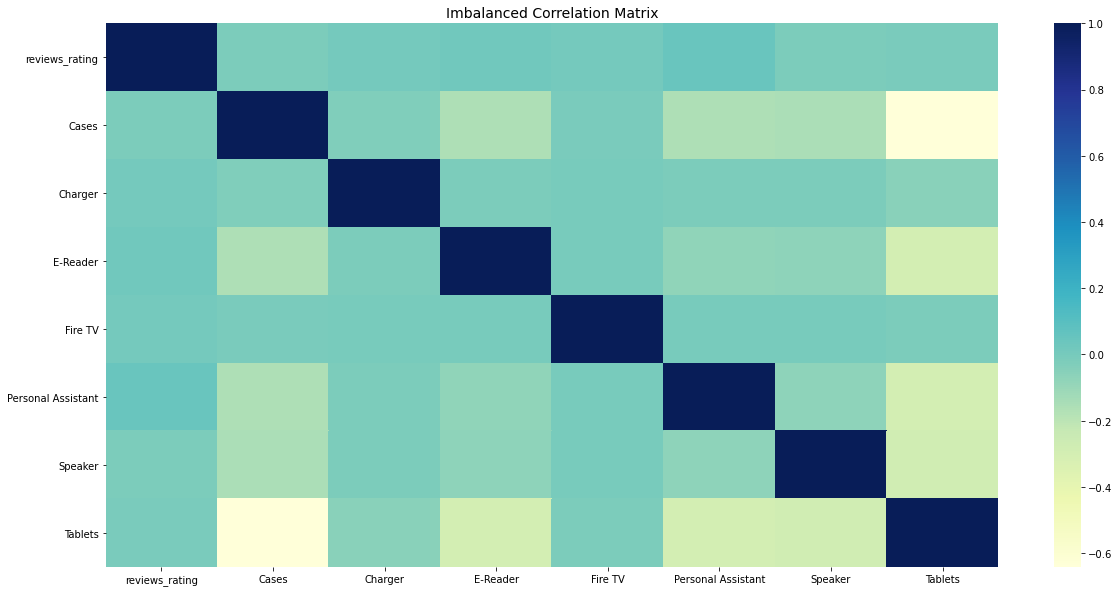

In [41]:
# Starting the resampling process, but before I do, I am making a Correlation matrix to observe the features
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = reviews_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

## Undersampling
Perform undersampling to balance the dataset so we can form better performing models

In [42]:
#downsample majority class
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from numpy import where

In [43]:
#undersample using random choice in numpy
minority_class_len = len(reviews_df[reviews_df['reviews_rating']==1])
print(minority_class_len)

276


In [44]:
five_star_indices = reviews_df[reviews_df['reviews_rating']==5].index
four_star_indices = reviews_df[reviews_df['reviews_rating']==4].index
three_star_indices = reviews_df[reviews_df['reviews_rating']==3].index
one_star_indices = reviews_df[reviews_df['reviews_rating']==1].index
two_star_indices = reviews_df[reviews_df['reviews_rating']==2].index

In [45]:
five_star_random_sample = np.random.choice(five_star_indices, minority_class_len, replace=False)
print(len(five_star_random_sample))

276


In [46]:
four_star_random_sample = np.random.choice(four_star_indices, minority_class_len, replace=False)
three_star_random_sample = np.random.choice(three_star_indices, minority_class_len, replace=False)
print(len(four_star_random_sample), len(three_star_random_sample))

276 276


In [47]:
#create a new balanced dataframe
under_sample_indices = np.concatenate([one_star_indices, two_star_indices, three_star_random_sample, four_star_random_sample, five_star_random_sample])

In [48]:
undersample_reviews = reviews_df.loc[under_sample_indices]

In [49]:
undersample_reviews.head()

,reviews_rating,reviews_text,Cases,Charger,E-Reader,Fire TV,Personal Assistant,Speaker,Tablets
20,1,i was looking for a kindle whitepaper i saw on...,0,0,1,0,0,0,0
70,1,looking at the picture and seeing it was 8th g...,0,0,1,0,0,0,0
265,1,purchased this device at launch 2 pack for 384...,0,0,0,0,1,0,0
361,1,i waited a couple months to review giving amaz...,0,0,0,0,1,0,0
504,1,qc is really bad on this product and does not ...,0,0,0,0,1,0,0


In [50]:
undersample_reviews['reviews_rating'].value_counts()

5    276
4    276
3    276
2    276
1    276
Name: reviews_rating, dtype: int64

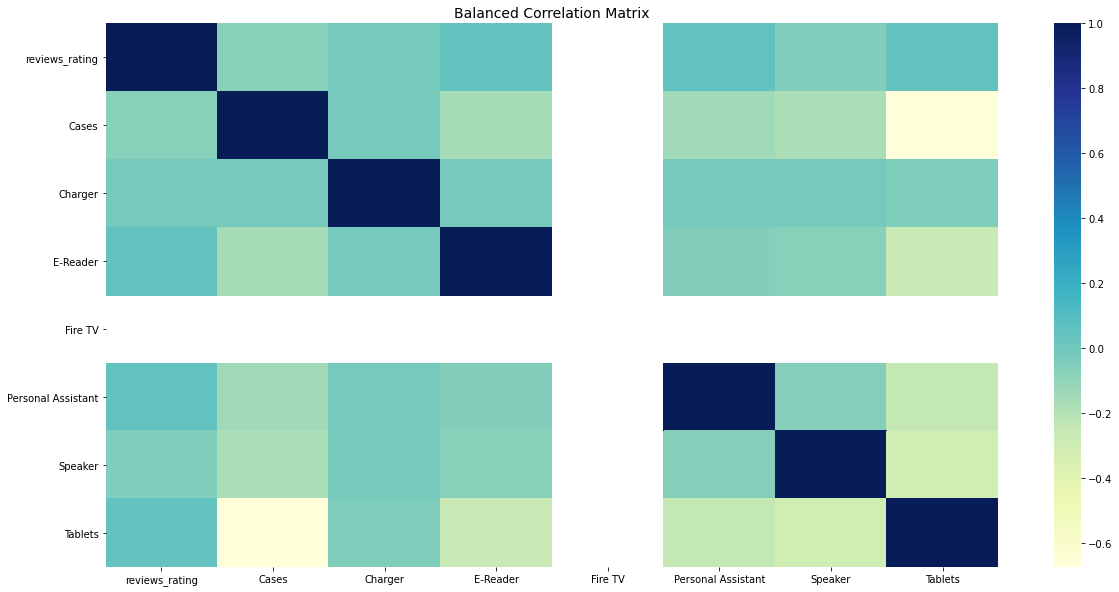

In [51]:
#Correlation matrix for balanced data
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = undersample_reviews.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)
plt.show()

Fire TVs are practically obsolete in our dataset after resample